In [57]:
import requests

In [58]:
URL = 'https://c00253517-analysis.anvil.app/_/api/metrics'

In [59]:
data = requests.get(URL)

In [60]:
metrics = data.json()

In [61]:
metrics

[[1644410880.0, 3, 1000, 'won'],
 [1644410880.0, 0, 200, 'lose'],
 [1644484992.0, 0, 500, 'lose'],
 [1644484992.0, 0, 600, 'lose'],
 [1644484992.0, 0, 1000, 'lose'],
 [1644484992.0, 0, 500, 'lose'],
 [1644484992.0, 0, 200, 'lose'],
 [1644484992.0, 0, 0, 'lose'],
 [1645004160.0, 2, 1000, 'won'],
 [1645004288.0, 1, 1000, 'won'],
 [1645004288.0, 0, 900, 'lose'],
 [1645004288.0, 0, 500, 'lose'],
 [1645004288.0, 0, 300, 'lose'],
 [1645004288.0, 0, 300, 'lose'],
 [1645004288.0, 0, 100, 'lose'],
 [1645004288.0, 0, 0, 'lose'],
 [1645004288.0, 0, 400, 'lose'],
 [1645004288.0, 3, 1000, 'won'],
 [1645004416.0, 1, 1000, 'won']]

In [62]:
score = [row for row in metrics if row[2] > 300 ]

In [63]:
score

[[1644410880.0, 3, 1000, 'won'],
 [1644484992.0, 0, 500, 'lose'],
 [1644484992.0, 0, 600, 'lose'],
 [1644484992.0, 0, 1000, 'lose'],
 [1644484992.0, 0, 500, 'lose'],
 [1645004160.0, 2, 1000, 'won'],
 [1645004288.0, 1, 1000, 'won'],
 [1645004288.0, 0, 900, 'lose'],
 [1645004288.0, 0, 500, 'lose'],
 [1645004288.0, 0, 400, 'lose'],
 [1645004288.0, 3, 1000, 'won'],
 [1645004416.0, 1, 1000, 'won']]

In [64]:
import datetime

In [65]:
datetime.datetime.fromtimestamp(1644484992.0)

datetime.datetime(2022, 2, 10, 9, 23, 12)

In [66]:
score = [[datetime.datetime.fromtimestamp(row[0]),row[1],row[2],row[3]] for row in score]

In [67]:
score

[[datetime.datetime(2022, 2, 9, 12, 48), 3, 1000, 'won'],
 [datetime.datetime(2022, 2, 10, 9, 23, 12), 0, 500, 'lose'],
 [datetime.datetime(2022, 2, 10, 9, 23, 12), 0, 600, 'lose'],
 [datetime.datetime(2022, 2, 10, 9, 23, 12), 0, 1000, 'lose'],
 [datetime.datetime(2022, 2, 10, 9, 23, 12), 0, 500, 'lose'],
 [datetime.datetime(2022, 2, 16, 9, 36), 2, 1000, 'won'],
 [datetime.datetime(2022, 2, 16, 9, 38, 8), 1, 1000, 'won'],
 [datetime.datetime(2022, 2, 16, 9, 38, 8), 0, 900, 'lose'],
 [datetime.datetime(2022, 2, 16, 9, 38, 8), 0, 500, 'lose'],
 [datetime.datetime(2022, 2, 16, 9, 38, 8), 0, 400, 'lose'],
 [datetime.datetime(2022, 2, 16, 9, 38, 8), 3, 1000, 'won'],
 [datetime.datetime(2022, 2, 16, 9, 40, 16), 1, 1000, 'won']]

In [68]:
import pandas as pd

In [69]:
df = pd.DataFrame(metrics)

In [70]:
df.shape

(19, 4)

In [71]:
df.head()

,0,1,2,3
0,1.644411e+09,3,1000,won
1,1.644411e+09,0,200,lose
2,1.644485e+09,0,500,lose
3,1.644485e+09,0,600,lose
4,1.644485e+09,0,1000,lose


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19 non-null     float64
 1   1       19 non-null     int64  
 2   2       19 non-null     int64  
 3   3       19 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 736.0+ bytes


In [73]:
df = pd.DataFrame(metrics,columns=["timestamp","health","score","condition"])

In [74]:
df.head()

,timestamp,health,score,condition
0,1.644411e+09,3,1000,won
1,1.644411e+09,0,200,lose
2,1.644485e+09,0,500,lose
3,1.644485e+09,0,600,lose
4,1.644485e+09,0,1000,lose


In [75]:
df["score"]

0     1000
1      200
2      500
3      600
4     1000
5      500
6      200
7        0
8     1000
9     1000
10     900
11     500
12     300
13     300
14     100
15       0
16     400
17    1000
18    1000
Name: score, dtype: int64

In [76]:
df["score"].unique()

array([1000,  200,  500,  600,    0,  900,  300,  100,  400], dtype=int64)

In [77]:
df.tail()

,timestamp,health,score,condition
14,1.645004e+09,0,100,lose
15,1.645004e+09,0,0,lose
16,1.645004e+09,0,400,lose
17,1.645004e+09,3,1000,won
18,1.645004e+09,1,1000,won


In [78]:
df.describe()

,timestamp,health,score
count,1.900000e+01,19.000000,19.000000
mean,1.644778e+09,0.526316,552.631579
std,2.736527e+05,1.020263,376.192062
min,1.644411e+09,0.000000,0.000000
25%,1.644485e+09,0.000000,250.000000
50%,1.645004e+09,0.000000,500.000000
75%,1.645004e+09,0.500000,1000.000000
max,1.645004e+09,3.000000,1000.000000


In [79]:
df["timestamp"]

0     1.644411e+09
1     1.644411e+09
2     1.644485e+09
3     1.644485e+09
4     1.644485e+09
5     1.644485e+09
6     1.644485e+09
7     1.644485e+09
8     1.645004e+09
9     1.645004e+09
10    1.645004e+09
11    1.645004e+09
12    1.645004e+09
13    1.645004e+09
14    1.645004e+09
15    1.645004e+09
16    1.645004e+09
17    1.645004e+09
18    1.645004e+09
Name: timestamp, dtype: float64

In [80]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [81]:
df.head()

,timestamp,health,score,condition
0,1970-01-01 00:00:01.644410880,3,1000,won
1,1970-01-01 00:00:01.644410880,0,200,lose
2,1970-01-01 00:00:01.644484992,0,500,lose
3,1970-01-01 00:00:01.644484992,0,600,lose
4,1970-01-01 00:00:01.644484992,0,1000,lose


In [82]:
def convert2ts(f):
    import datetime
    return datetime.datetime.fromtimestamp(f)

In [83]:
df = pd.DataFrame(metrics,columns=["timestamp","health","score","condition"])

In [84]:
df

,timestamp,health,score,condition
0,1.644411e+09,3,1000,won
1,1.644411e+09,0,200,lose
2,1.644485e+09,0,500,lose
3,1.644485e+09,0,600,lose
4,1.644485e+09,0,1000,lose
5,1.644485e+09,0,500,lose
6,1.644485e+09,0,200,lose
7,1.644485e+09,0,0,lose
8,1.645004e+09,2,1000,won
9,1.645004e+09,1,1000,won


In [85]:
df["timestamp"] = df["timestamp"].apply(convert2ts)

In [86]:
df.head()

,timestamp,health,score,condition
0,2022-02-09 12:48:00,3,1000,won
1,2022-02-09 12:48:00,0,200,lose
2,2022-02-10 09:23:12,0,500,lose
3,2022-02-10 09:23:12,0,600,lose
4,2022-02-10 09:23:12,0,1000,lose


<AxesSubplot:>

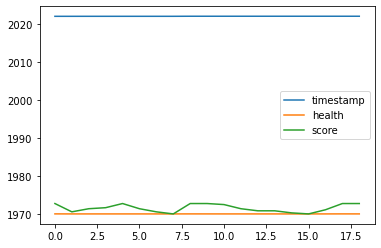

In [87]:
df.plot()

<AxesSubplot:>

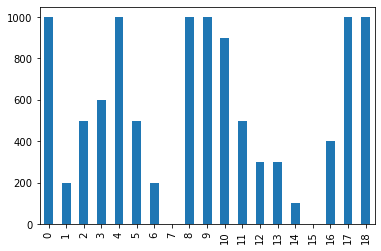

In [88]:
df["score"].plot(kind="bar")

In [89]:
import plotly.express as px

In [90]:
fig = px.bar(
    x = df.timestamp,
    y = df.score,
    labels = {
        "x" : "Date",
        "y" : "Score",
    },
    title = "Score over time"
)
fig.show()

In [91]:
fig = px.scatter_ternary(
    df, 
    a="health",
    b="score",
    c="condition"
)
fig.show()

In [92]:
df

,timestamp,health,score,condition
0,2022-02-09 12:48:00,3,1000,won
1,2022-02-09 12:48:00,0,200,lose
2,2022-02-10 09:23:12,0,500,lose
3,2022-02-10 09:23:12,0,600,lose
4,2022-02-10 09:23:12,0,1000,lose
5,2022-02-10 09:23:12,0,500,lose
6,2022-02-10 09:23:12,0,200,lose
7,2022-02-10 09:23:12,0,0,lose
8,2022-02-16 09:36:00,2,1000,won
9,2022-02-16 09:38:08,1,1000,won


In [93]:
fig = px.scatter(df, y ="score", x = "timestamp", color="condition",symbol="condition")
fig.update_traces(marker_size=10)
fig.show()

In [105]:
fig = px.bar(df, x = "health", y = "score", color = "condition")
fig.show()

In [112]:
fig = px.area(df, x = "condition", y = "score", color= "health")
fig.show()                 

In [125]:
fig = px.sunburst(df, path=['timestamp','condition','health'],values='score')
fig.show()